In [ ]:
pip install requests

In [ ]:
pip install html5lib

In [ ]:
pip install bs4

In [ ]:
import requests

In [ ]:
import csv

In [ ]:
import pandas as pd

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
url="https://results.eci.gov.in/PcResultGenJune2024/index.htm"

In [ ]:
r=requests.get(url)

In [ ]:
htmlcontent = r.content
print(htmlcontent)

b'<!doctype html>\r\n<html lang="en">\r\n\r\n<head>\r\n  <!-- Required meta tags -->\r\n  <meta charset="utf-8"> \r\n    <meta name="viewport" content="width=device-width, initial-scale=1"> \r\n    <meta http-equiv=\'Content-Type\' content=\'text/html; charset=UTF-8\'>\r\n    <meta http-equiv=\'X-UA-Compatible\' content=\'IE=7\'>\r\n    <meta http-equiv=\'Cache-Control\' content=\'no-cache, no-store, must-revalidate\'>\r\n    <meta http-equiv=\'Pragma\' content=\'no-cache\'>\r\n    <meta http-equiv=\'Expires\' content=\'0\'>\r\n    <meta http-equiv=\'refresh\' content=\'300\'>\r\n  <!-- Bootstrap CSS -->\r\n  <link href="css/bootstrap.min.css" rel="stylesheet">\r\n  <link href="css/custom.css" rel="stylesheet">\r\n  <link href="css/responsive.css" rel="stylesheet">\r\n  <link href="css/font.css" rel="stylesheet">\r\n  <link rel=\'shortcut icon\' href=\'img/icons/favicon.ico\' type="image/x-icon">\r\n  <title>Election Commission of India</title>\r\n  <style type="text/css">\r\n\r\n  </s

In [ ]:
soup=BeautifulSoup(htmlcontent,'html.parser')
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>

<html lang="en">
<head>
<!-- Required meta tags -->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=7" http-equiv="X-UA-Compatible"/>
<meta content="no-cache, no-store, must-revalidate" http-equiv="Cache-Control"/>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="0" http-equiv="Expires"/>
<meta content="300" http-equiv="refresh"/>
<!-- Bootstrap CSS -->
<link href="css/bootstrap.min.css" rel="stylesheet"/>
<link href="css/custom.css" rel="stylesheet"/>
<link href="css/responsive.css" rel="stylesheet"/>
<link href="css/font.css" rel="stylesheet"/>
<link href="img/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<title>Election Commission of India</title>
<style type="text/css">
</style>
<script>!function(a){var e="https://s.go-mpulse.net/boomerang/",t="addEventListener";if("False"=="Tr

In [ ]:
title=soup.title
print(type(soup))
print(type(title))
print(type(title.string))

<class 'bs4.BeautifulSoup'>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>


In [ ]:
print(title)

<title>Election Commission of India</title>


In [ ]:
options = soup.find_all('option')
option_links = set()
states=set()

for link in options:
    # Check if 'value' attribute exists and is not None
    option_value = link.get('value')
    if option_value:
        link_text = f"https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-{option_value}.htm"
        option_links.add(link_text)
        states.add(link.text.strip())

        print(link_text)


print(states)


https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U01.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S01.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S02.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S03.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S04.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U02.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S26.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U03.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S05.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S06.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S07.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S08.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U08.htm
https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S27.htm
https:

In [ ]:
def state_cons(lnk):
    sp=BeautifulSoup(f"{lnk}",'html.parser')
    l=sp.find('span').get_text().split()
    constituency_number=(l[0])
    constituency_name=l[2]
    sn=sp.find('strong').get_text()
    state_name=sn[2:len(sn)-1]
    lst=[state_name, constituency_name, constituency_number]
    return lst


In [ ]:
def constituency_details(url,h):
    # Request the page content
    res = requests.get(url)
    so = BeautifulSoup(res.content, 'html.parser')

    # Find the table in the parsed HTML
    table = so.find('table')

    # Define the headers directly from <th> tags in the <thead> section
    headers = ['state', 'constituency_name', 'constituency_number']
    thead = table.find('thead')
    if thead:
        for th in thead.find_all('th')[1:]:  # Start from the second <th> element
            headers.append(th.text.strip())
    # Extract the rows
    rows = []
    tbody = table.find('tbody')
    if tbody:
        for tr in tbody.find_all('tr'):
            cells = tr.find_all('td')[1:]  # All <td> elements within <tr>
            if len(cells) > 0:
                cells_text = [cell.text.strip().replace('\n', ' ') for cell in cells]
                # Construct row with dummy values plus extracted data
                row = h + cells_text[:len(headers)-3]
                rows.append(row)

    # Ensure all rows have the same number of columns as headers
    for row in rows:
        while len(row) < len(headers):
            row.append('')


    # Create a DataFrame
    df = pd.DataFrame(rows, columns=headers)
    return(df)


# Example URL list



In [ ]:

count=0
cl=set()
for url in option_links:
    re=requests.get(url)
    statehtml=re.content
    s=BeautifulSoup(statehtml,'html.parser')
    c=s.find_all('option')


    for l in c:
    # Check if 'value' attribute exists and is not None
        option_value = l.get('value')
        if option_value:
              link_text = f"https://results.eci.gov.in/PcResultGenJune2024/Constituencywise{option_value}.htm"
              count=count+1
              cl.add(link_text)

soc=list(cl)
lst=[]
c=0
dfs=[]
for i in soc:
    s = requests.get(i)
    sp=BeautifulSoup(s.content,'html.parser')
    name_con=sp.find('h2')
    lst.append(name_con)
    headers=state_cons(name_con)
    c=c+1
    df=constituency_details(i,headers)
    dfs.append(df)







In [ ]:
print(c)

543


In [ ]:
new_df=pd.concat(dfs,axis=0,ignore_index=True)

In [ ]:
print(dfs[0])



    state constituency_name constituency_number          Candidate  \
0  Kerala          Attingal                  19  ADV ADOOR PRAKASH   
1  Kerala          Attingal                  19              V JOY   
2  Kerala          Attingal                  19   V  MURALEEDHARAN   
3  Kerala          Attingal                  19          SURABHI S   
4  Kerala          Attingal                  19        PRAKASH P L   
5  Kerala          Attingal                  19         SANTHOSH K   
6  Kerala          Attingal                  19          PRAKASH S   
7  Kerala          Attingal                  19               NOTA   

                                 Party EVM Votes Postal Votes Total Votes  \
0             Indian National Congress    323273         4778      328051   
1  Communist Party of India  (Marxist)    321715         5652      327367   
2               Bharatiya Janata Party    307710         4069      311779   
3                  Bahujan Samaj Party      4485           39

In [ ]:
print(new_df)

            state constituency_name constituency_number  \
0          Kerala          Attingal                  19   
1          Kerala          Attingal                  19   
2          Kerala          Attingal                  19   
3          Kerala          Attingal                  19   
4          Kerala          Attingal                  19   
...           ...               ...                 ...   
8897  Maharashtra              Beed                  39   
8898  Maharashtra              Beed                  39   
8899  Maharashtra              Beed                  39   
8900  Maharashtra              Beed                  39   
8901  Maharashtra              Beed                  39   

                    Candidate                                Party EVM Votes  \
0           ADV ADOOR PRAKASH             Indian National Congress    323273   
1                       V JOY  Communist Party of India  (Marxist)    321715   
2            V  MURALEEDHARAN               Bharati

In [ ]:
new_df.to_csv('a1.csv', index=False)

In [ ]:
print(c)
new_df = pd.concat(dfs, axis=0, ignore_index=True)
print(dfs[0])
print(new_df)

# Save the DataFrame to a CSV file
new_df.to_csv('a2.csv', index=False)

543
    state constituency_name constituency_number          Candidate  \
0  Kerala          Attingal                  19  ADV ADOOR PRAKASH   
1  Kerala          Attingal                  19              V JOY   
2  Kerala          Attingal                  19   V  MURALEEDHARAN   
3  Kerala          Attingal                  19          SURABHI S   
4  Kerala          Attingal                  19        PRAKASH P L   
5  Kerala          Attingal                  19         SANTHOSH K   
6  Kerala          Attingal                  19          PRAKASH S   
7  Kerala          Attingal                  19               NOTA   

                                 Party EVM Votes Postal Votes Total Votes  \
0             Indian National Congress    323273         4778      328051   
1  Communist Party of India  (Marxist)    321715         5652      327367   
2               Bharatiya Janata Party    307710         4069      311779   
3                  Bahujan Samaj Party      4485         

In [ ]:
# Filter the DataFrame for rows where the state is 'Tamil Nadu'
tamil_nadu_df = new_df[new_df['state'] == 'Tamil Nadu']

# Count the number of rows
tamil_nadu_count = tamil_nadu_df.shape[0]

# Print the count
print(f"Number of rows where state is Tamil Nadu: {tamil_nadu_count}")


Number of rows where state is Tamil Nadu: 989


In [ ]:
tamil_nadu_df

,state,constituency_name,constituency_number,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes
415,Tamil Nadu,VILUPPURAM,13,RAVIKUMAR. D,Viduthalai Chiruthaigal Katchi,474230,2803,477033,41.39
416,Tamil Nadu,VILUPPURAM,13,BHAGYARAJ. J,All India Anna Dravida Munnetra Kazhagam,404503,1827,406330,35.25
417,Tamil Nadu,VILUPPURAM,13,MURALI SANKAR. S,Pattali Makkal Katchi,180020,1862,181882,15.78
418,Tamil Nadu,VILUPPURAM,13,KALANCHIYAM. M,Naam Tamilar Katchi,56766,476,57242,4.97
419,Tamil Nadu,VILUPPURAM,13,KARUNCHIRUTHAI KALIYAMURTHY. K,Bahujan Samaj Party,3883,37,3920,0.34
...,...,...,...,...,...,...,...,...,...
8449,Tamil Nadu,RAMANATHAPURAM,35,SATHURAGIRI K,Independent,815,12,827,0.07
8450,Tamil Nadu,RAMANATHAPURAM,35,SIKKANDAR B,Independent,804,19,823,0.07
8451,Tamil Nadu,RAMANATHAPURAM,35,VIGNESH V,Independent,643,9,652,0.06
8452,Tamil Nadu,RAMANATHAPURAM,35,PANNERSELVAM O S/O OCHATTHEVAR,Independent,564,8,572,0.05


In [ ]:
new_df = new_df.applymap(lambda s: s.lower() if type(s) == str else s)

In [ ]:
postal_votes_null = new_df[new_df['EVM Votes'].isnull()]

# You can print or save these DataFrames as needed
print("Rows with null 'postal votes':")
print(postal_votes_null)

Rows with null 'postal votes':
Empty DataFrame
Columns: [state, constituency_name, constituency_number, Candidate, Party, EVM Votes, Postal Votes, Total Votes, % of Votes]
Index: []


In [ ]:
new_df

,state,constituency_name,constituency_number,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes
0,kerala,attingal,19,adv adoor prakash,indian national congress,323273,4778,328051,33.29
1,kerala,attingal,19,v joy,communist party of india (marxist),321715,5652,327367,33.22
2,kerala,attingal,19,v muraleedharan,bharatiya janata party,307710,4069,311779,31.64
3,kerala,attingal,19,surabhi s,bahujan samaj party,4485,39,4524,0.46
4,kerala,attingal,19,prakash p l,independent,1762,52,1814,0.18
...,...,...,...,...,...,...,...,...,...
8897,maharashtra,beed,39,laxmibai bajirao more,independent,382,-,382,0.03
8898,maharashtra,beed,39,syed minhaj ali,independent,310,-,310,0.02
8899,maharashtra,beed,39,salim allabaksha sayyad,independent,238,-,238,0.02
8900,maharashtra,beed,39,sadek ibrahim shaikh,independent,206,-,206,0.01


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'a1.csv'
election_data = pd.read_csv(file_path)

# Clean and preprocess the data
def clean_votes(column):
    column = column.replace(',', '', regex=True)
    column = pd.to_numeric(column, errors='coerce')
    return column

election_data['Total Votes'] = clean_votes(election_data['Total Votes'])
election_data['EVM Votes'] = clean_votes(election_data['EVM Votes'])
election_data['Postal Votes'] = clean_votes(election_data['Postal Votes'])
election_data['% of Votes'] = election_data['% of Votes'].replace(['%', '-'], '', regex=True)
election_data['% of Votes'] = pd.to_numeric(election_data['% of Votes'], errors='coerce')

# Drop rows with NaN values in key columns
election_data = election_data.dropna(subset=['Total Votes', 'EVM Votes', 'Postal Votes', '% of Votes'])

# Filter top 30 parties by total votes
top_30_parties = election_data.groupby('Party')['Total Votes'].sum().sort_values(ascending=False).head(30).index
top_30_data = election_data[election_data['Party'].isin(top_30_parties)]

<ipython-input-38-1fcfac95bffc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Votes', y='Candidate', data=top_candidates, palette='viridis')


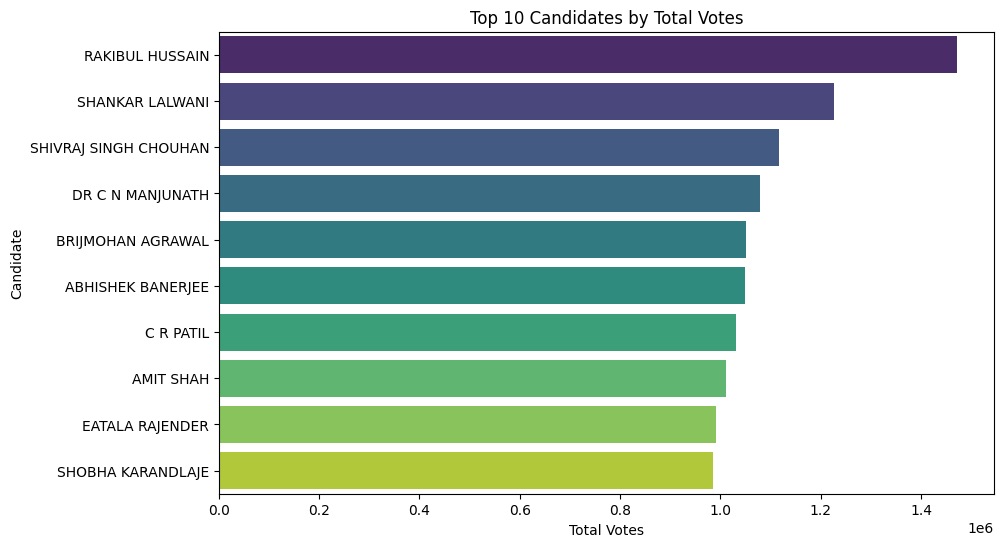

In [ ]:
# Top candidates by total votes
top_candidates = election_data.sort_values(by='Total Votes', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Votes', y='Candidate', data=top_candidates, palette='viridis')
plt.title('Top 10 Candidates by Total Votes')
plt.xlabel('Total Votes')
plt.ylabel('Candidate')
plt.show()

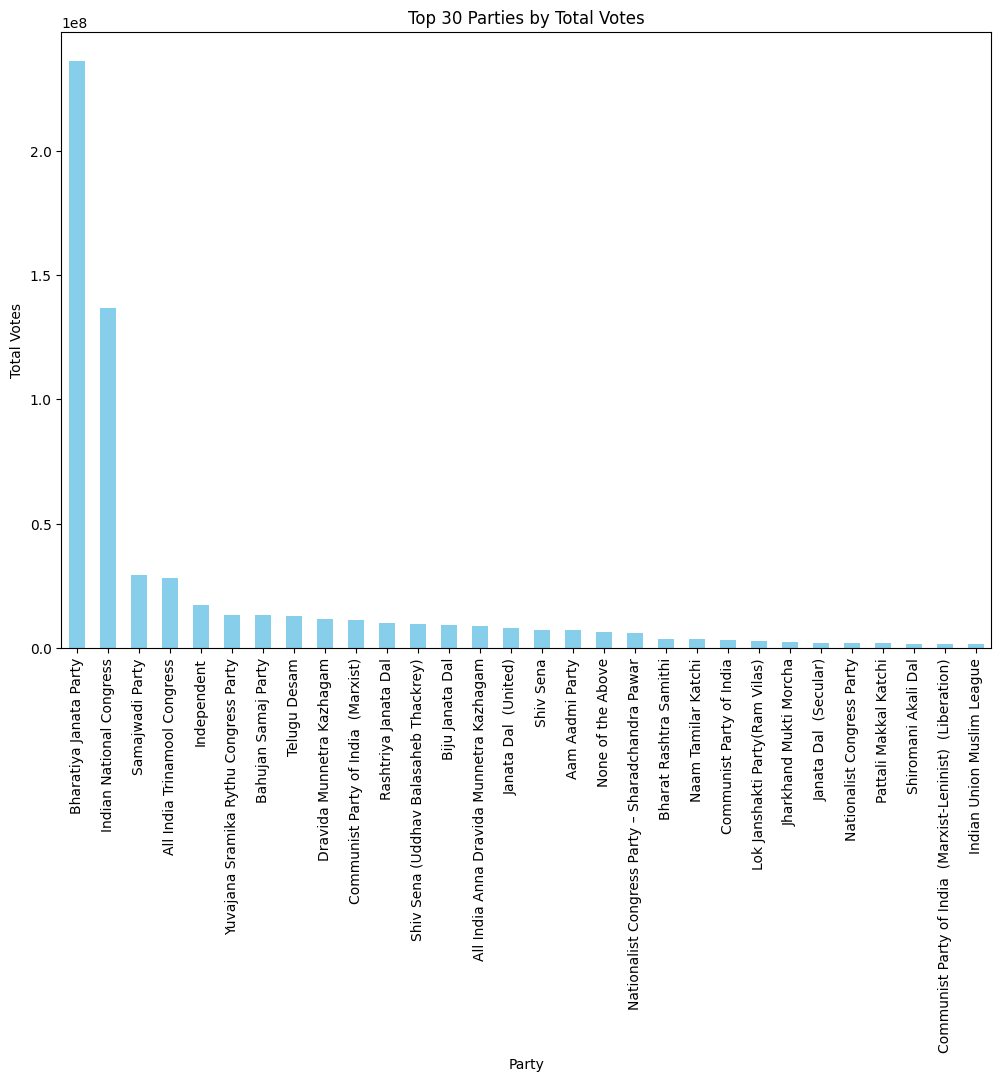

In [ ]:
# Party-wise vote distribution (Top 30 Parties)
party_votes = top_30_data.groupby('Party')['Total Votes'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
party_votes.plot(kind='bar', color='skyblue')
plt.title('Top 30 Parties by Total Votes')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.show()

In [ ]:
# Constituency with highest voter turnout
highest_turnout = election_data.groupby('constituency_name')['Total Votes'].sum().sort_values(ascending=False).head(1)
print("Constituency with Highest Voter Turnout:", highest_turnout)

Constituency with Highest Voter Turnout: constituency_name
Bangalore    6234065.0
Name: Total Votes, dtype: float64


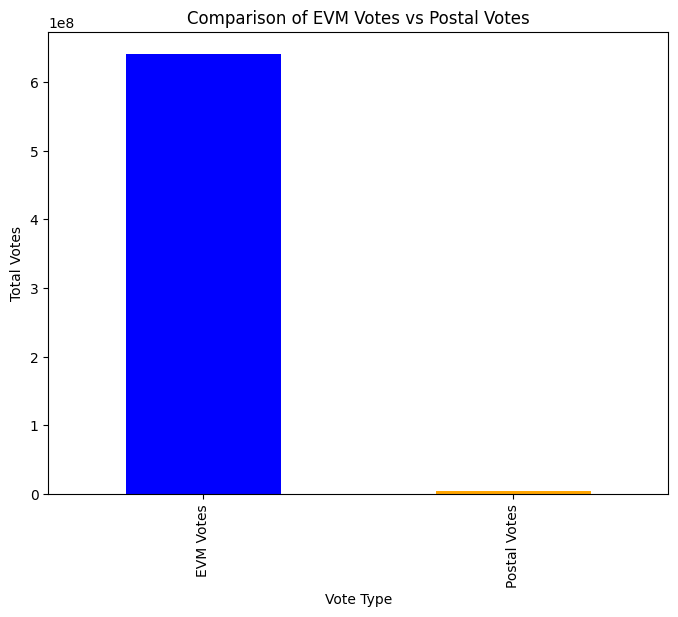

In [ ]:
# Comparison of EVM votes vs postal votes
evm_vs_postal = election_data[['EVM Votes', 'Postal Votes']].sum()
plt.figure(figsize=(8, 6))
evm_vs_postal.plot(kind='bar', color=['blue', 'orange'])
plt.title('Comparison of EVM Votes vs Postal Votes')
plt.xlabel('Vote Type')
plt.ylabel('Total Votes')
plt.show()

<ipython-input-42-2018b6a42a02>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='state', data=winning_candidates_top_30, order=winning_candidates_top_30['state'].value_counts().index, palette='coolwarm')


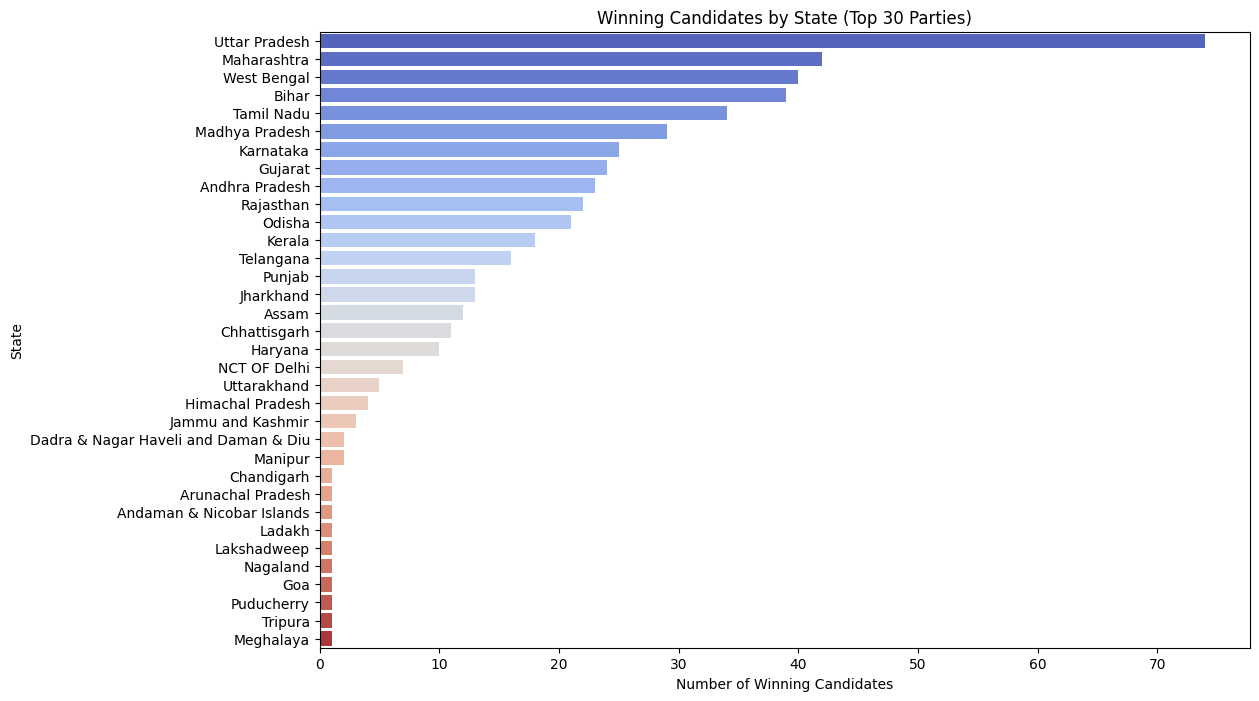

In [ ]:
# Winning candidates by state (Top 30 Parties)
winning_candidates = election_data.loc[election_data.groupby('constituency_name')['% of Votes'].idxmax()]
winning_candidates_top_30 = winning_candidates[winning_candidates['Party'].isin(top_30_parties)]
plt.figure(figsize=(12, 8))
sns.countplot(y='state', data=winning_candidates_top_30, order=winning_candidates_top_30['state'].value_counts().index, palette='coolwarm')
plt.title('Winning Candidates by State (Top 30 Parties)')
plt.xlabel('Number of Winning Candidates')
plt.ylabel('State')
plt.show()

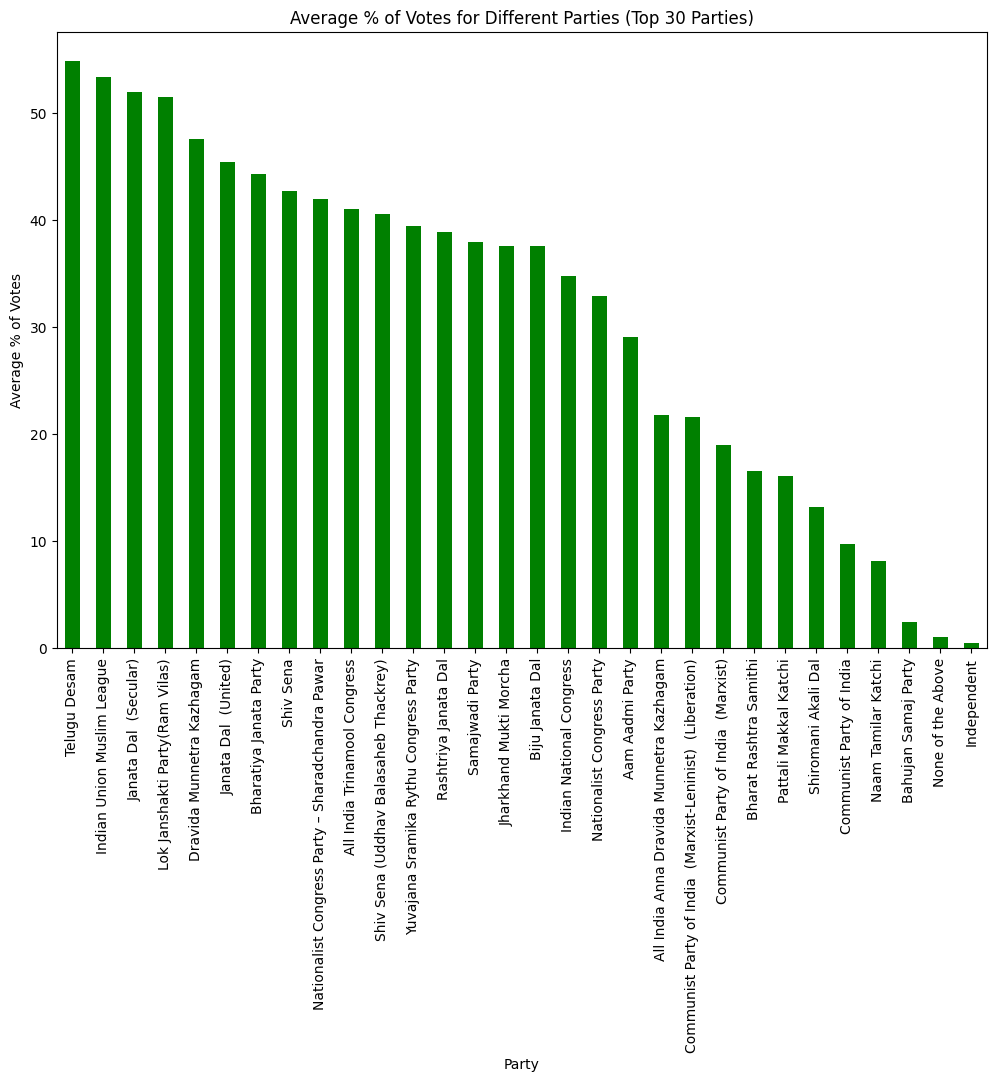

In [ ]:
# Average % of votes for different parties (Top 30 Parties)
average_vote_percentage = top_30_data.groupby('Party')['% of Votes'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
average_vote_percentage.plot(kind='bar', color='green')
plt.title('Average % of Votes for Different Parties (Top 30 Parties)')
plt.xlabel('Party')
plt.ylabel('Average % of Votes')
plt.show()

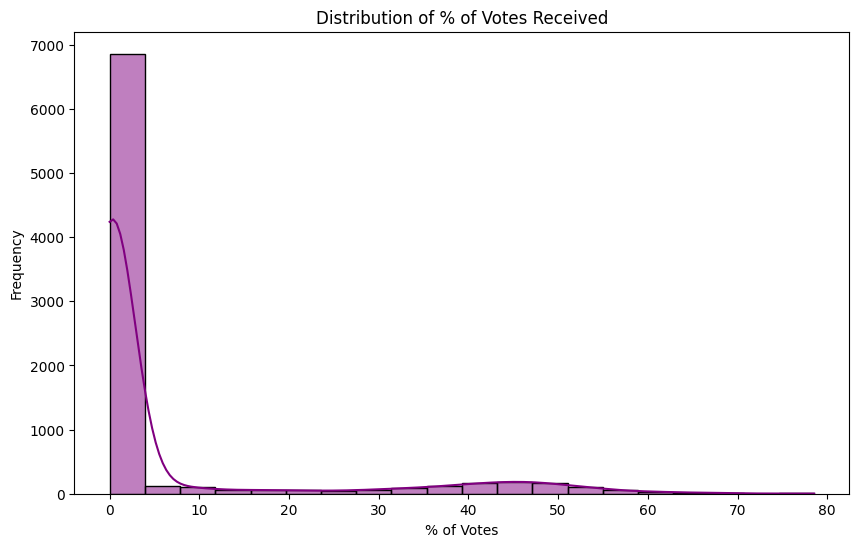

In [ ]:
# Distribution of % of votes received
plt.figure(figsize=(10, 6))
sns.histplot(election_data['% of Votes'], bins=20, kde=True, color='purple')
plt.title('Distribution of % of Votes Received')
plt.xlabel('% of Votes')
plt.ylabel('Frequency')
plt.show()

<ipython-input-45-762f3ac282f7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vote Margin', y='constituency_name', data=least_competitive, palette='inferno')


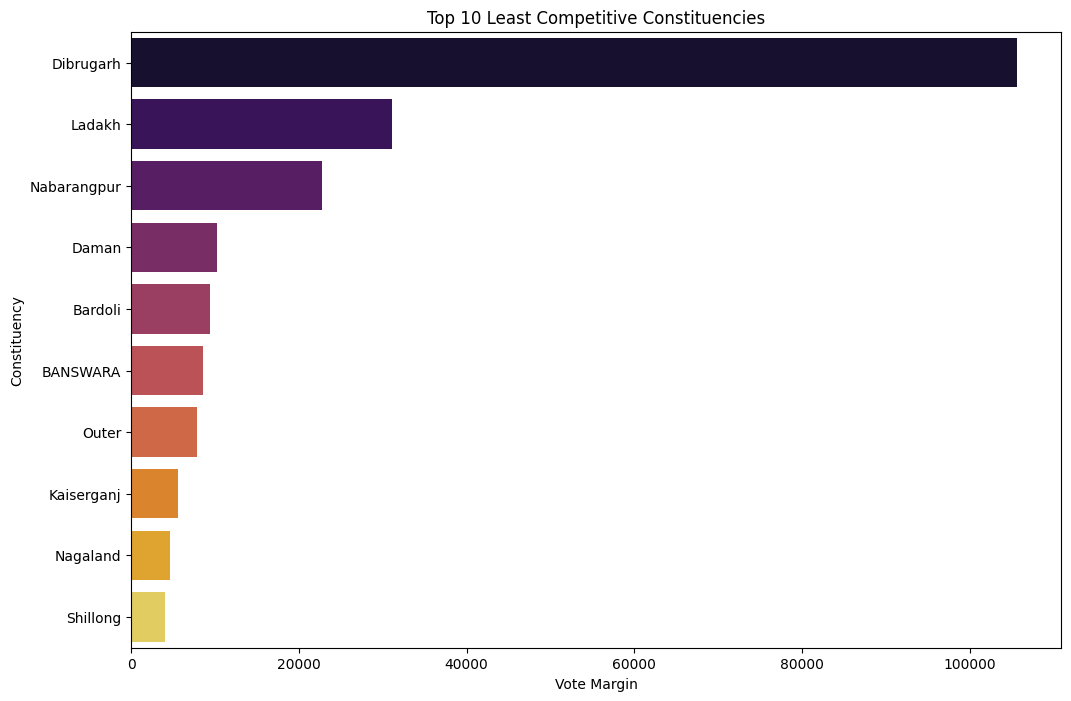

In [ ]:
# Least competitive constituencies (largest margin of victory)
least_competitive = election_data.sort_values(by=['constituency_name', 'Total Votes']).groupby('constituency_name').apply(lambda x: x.head(2)).reset_index(drop=True)
least_competitive['Vote Margin'] = least_competitive.groupby('constituency_name')['Total Votes'].diff().abs()
least_competitive = least_competitive.groupby('constituency_name').apply(lambda x: x.nlargest(1, 'Vote Margin')).reset_index(drop=True).sort_values(by='Vote Margin', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x='Vote Margin', y='constituency_name', data=least_competitive, palette='inferno')
plt.title('Top 10 Least Competitive Constituencies')
plt.xlabel('Vote Margin')
plt.ylabel('Constituency')
plt.show()

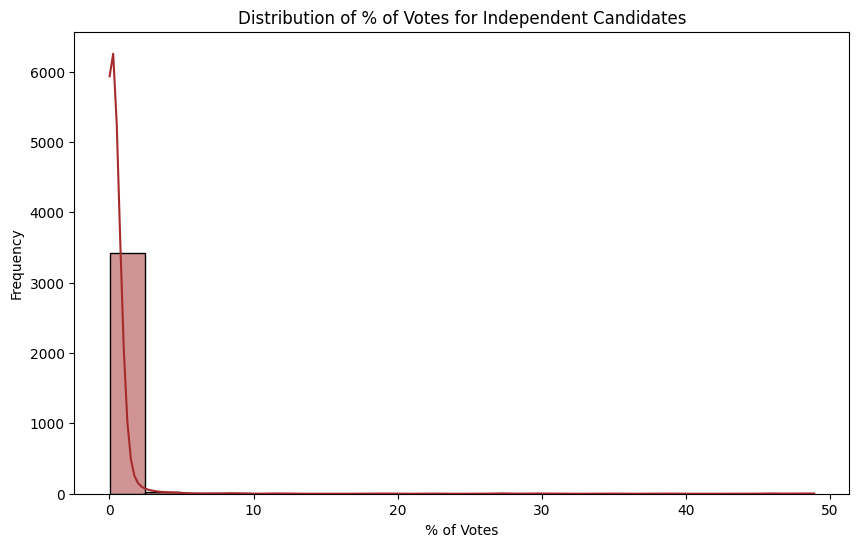

In [ ]:
# Insights on independent candidates
independent_candidates = election_data[election_data['Party'] == 'Independent']
plt.figure(figsize=(10, 6))
sns.histplot(independent_candidates['% of Votes'], bins=20, kde=True, color='brown')
plt.title('Distribution of % of Votes for Independent Candidates')
plt.xlabel('% of Votes')
plt.ylabel('Frequency')
plt.show()

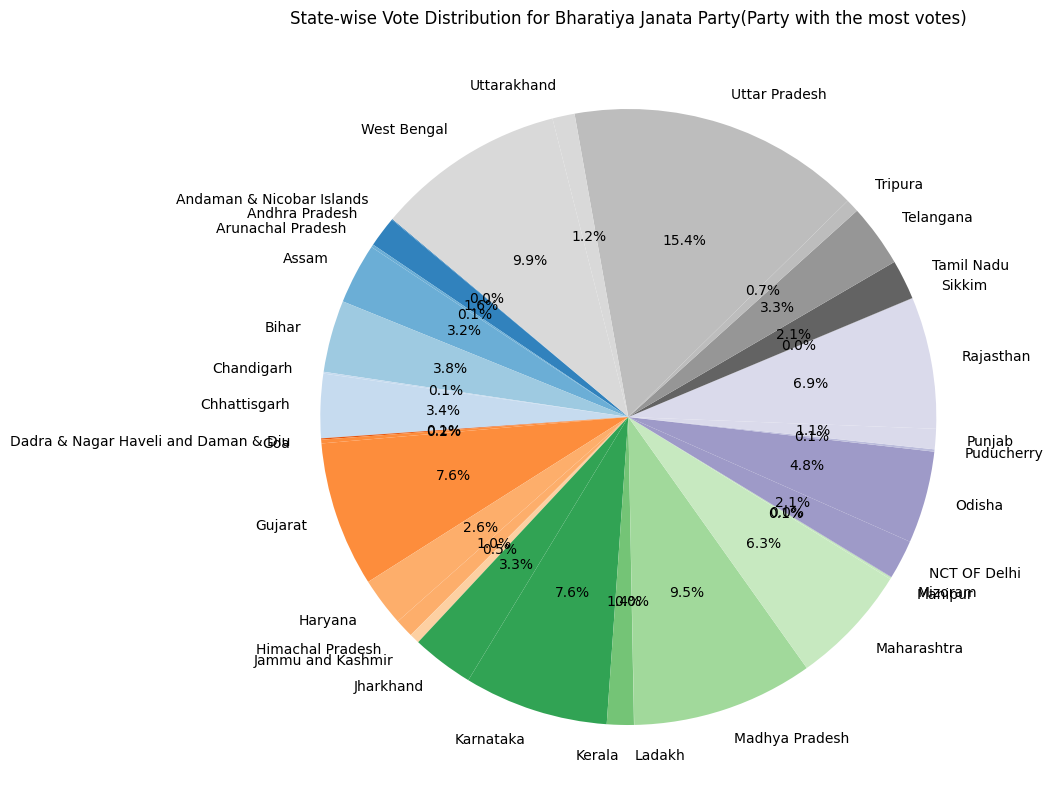

In [ ]:
top_party = party_votes.idxmax()
top_party_data = election_data[election_data['Party'] == top_party]
state_votes = top_party_data.groupby('state')['Total Votes'].sum()

plt.figure(figsize=(10, 10))
state_votes.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='tab20c')
plt.title(f'State-wise Vote Distribution for {top_party}(Party with the most votes)')
plt.ylabel('')
plt.show()

In [ ]:
election_data.to_csv('elec.csv', index=False)

In [ ]:
def is_numeric(value):
    try:
        # Handle both string and float values
        if isinstance(value, float) or isinstance(value, int):
            return True
        elif isinstance(value, str):
            float(value.replace(',', ''))
            return True
        else:
            return False
    except ValueError:
        return False

# Filter non-numerical values in 'Total Votes' column
non_numerical_total_votes = election_data[~election_data['Total Votes'].apply(is_numeric)]['Total Votes'].unique()

# Display non-numerical values
non_numerical_total_votes

array([], dtype=float64)

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('a1.csv')

# Replace '-' with 0
df.replace('-', 0, inplace=True)

# Save the updated dataset to a new CSV file
df.to_csv('a3.csv', index=False)


In [ ]:
last_four_columns = df.iloc[:, -4:]

# Check for non-numeric values
non_numeric = last_four_columns.apply(lambda x: pd.to_numeric(x, errors='coerce').isna().any())

# Output the result
if non_numeric.any():
    print("Non-numeric values found in the last four columns:")
    print(non_numeric[non_numeric].index.tolist())
else:
    print("All values in the last four columns are numeric or floats.")

All values in the last four columns are numeric or floats.
